In [12]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tourism-data-tanzania/SampleSubmission.csv
/kaggle/input/tourism-data-tanzania/Train.csv
/kaggle/input/tourism-data-tanzania/VariableDefinitions.csv
/kaggle/input/tourism-data-tanzania/Test.csv


In [13]:
train_df=pd.read_csv("../input/tourism-data-tanzania/Train.csv")
test_df=pd.read_csv("../input/tourism-data-tanzania/Test.csv")
sub_df=pd.read_csv("../input/tourism-data-tanzania/SampleSubmission.csv")
descp=pd.read_csv("../input/tourism-data-tanzania/VariableDefinitions.csv")

In [14]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [22]:
print("Size of train",train_df.shape)
print("Size of test",test_df.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [15]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


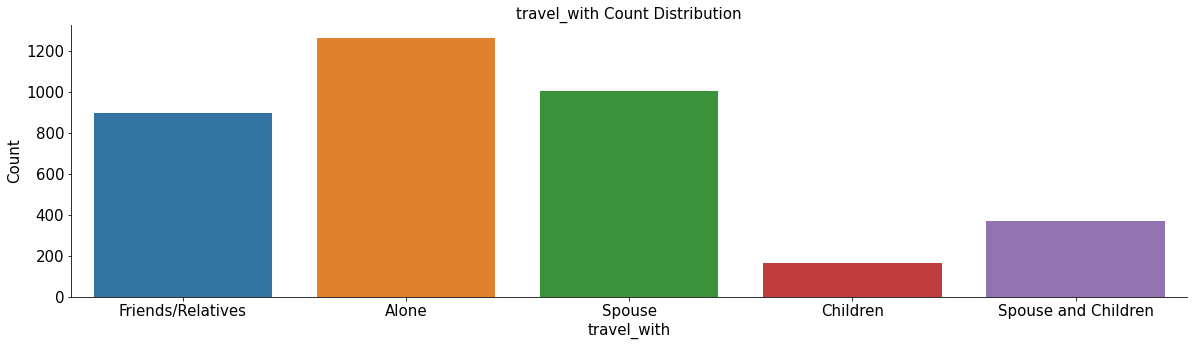

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train_df)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [21]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['main_activity'], train_df['country'], margins=True)

country,ALGERIA,ANGOLA,ARGENTINA,AUSTRALIA,AUSTRIA,BELGIUM,BERMUDA,BRAZIL,BURGARIA,BURUNDI,CANADA,CAPE VERDE,CHILE,CHINA,COLOMBIA,COMORO,CONGO,COSTARICA,CROATIA,CYPRUS,CZECH REPUBLIC,DENMARK,DJIBOUT,DOMINICA,DRC,EGYPT,ESTONIA,ETHIOPIA,FINLAND,FRANCE,GEORGIA,GERMANY,GHANA,GREECE,HUNGARY,INDIA,INDONESIA,IRAN,IRAQ,IRELAND,ISRAEL,ITALY,IVORY COAST,JAPAN,KENYA,KOREA,KUWAIT,LATVIA,LEBANON,LESOTHO,LITHUANIA,LUXEMBOURG,MADAGASCAR,MALAWI,MALAYSIA,MALT,MAURITIUS,MEXICO,MONTENEGRO,MORROCO,MOZAMBIQUE,MYANMAR,NAMIBIA,NEPAL,NETHERLANDS,NEW ZEALAND,NIGER,NIGERIA,NORWAY,OMAN,PAKISTAN,PHILIPINES,POLAND,PORTUGAL,QATAR,ROMANIA,RUSSIA,RWANDA,SCOTLAND,SERBIA,SINGAPORE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SUDAN,SWAZILAND,SWEDEN,SWIZERLAND,TAIWAN,THAILAND,TRINIDAD TOBACCO,TUNISIA,TURKEY,UAE,UGANDA,UKRAIN,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,YEMEN,ZAMBIA,ZIMBABWE,All
main_activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beach tourism,1,0,0,15,3,7,0,1,1,9,24,0,0,19,1,1,0,0,1,0,0,10,0,0,5,2,0,1,2,55,1,59,0,2,0,16,1,1,0,5,3,210,0,2,42,2,1,0,1,0,0,1,0,6,1,1,0,0,1,0,2,0,1,1,8,1,1,0,4,9,2,0,7,1,1,2,5,14,0,6,1,0,1,78,38,0,2,1,12,9,0,0,0,1,1,11,34,1,1,94,64,1,1,19,76,1025
Bird watching,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,3,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,1,3,0,0,6,4,37
Conference tourism,0,0,0,23,4,1,0,1,0,0,15,0,0,1,0,0,0,0,1,0,5,6,0,0,0,3,0,0,0,25,0,18,0,0,0,1,0,0,0,2,1,5,0,6,3,3,0,1,0,0,1,0,0,1,16,0,0,0,0,0,0,0,0,0,3,5,0,0,3,0,0,0,3,0,0,0,1,1,0,0,3,0,0,2,7,0,0,0,4,4,0,0,0,0,1,1,0,0,3,99,83,0,0,1,0,367
Cultural tourism,0,1,0,9,2,7,1,1,0,22,8,0,0,1,0,0,2,0,0,0,3,5,1,0,10,0,1,0,2,19,0,25,0,2,0,3,0,0,0,2,2,32,0,7,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,1,5,6,0,0,1,1,0,0,0,8,1,0,0,0,0,11,10,0,1,0,3,3,0,0,0,0,1,4,18,0,1,46,42,0,0,4,6,359
Diving and Sport Fishing,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,13
Hunting tourism,0,0,0,4,0,4,0,0,1,16,3,0,0,2,0,0,5,0,0,0,0,3,0,0,4,0,0,0,0,7,0,8,0,2,0,7,0,0,0,1,0,9,1,17,62,1,0,0,0,1,0,0,1,9,2,0,0,0,0,0,1,0,1,0,1,0,0,0,3,12,1,0,0,0,2,0,0,6,1,0,0,0,0,20,5,0,1,0,3,3,0,1,0,0,0,5,43,1,1,43,23,0,1,45,64,457
Mountain climbing,0,0,0,0,1,2,0,1,0,4,3,1,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,5,0,2,0,3,1,0,0,19,1,0,1,0,0,2,0,3,39,0,0,0,2,0,0,0,0,3,0,0,1,0,0,0,4,0,0,1,1,0,0,0,1,2,1,0,0,1,0,0,0,7,0,0,0,0,0,29,1,0,0,0,2,2,0,1,0,0,0,3,14,0,0,11,21,0,0,14,18,234
Wildlife tourism,1,0,1,131,7,27,0,6,0,13,61,0,2,39,2,0,3,1,0,0,3,17,1,1,11,4,0,0,4,165,0,103,1,1,2,36,1,1,0,19,9,122,0,18,72,6,1,1,0,0,3,1,0,1,3,1,1,2,0,1,1,1,0,0,91,12,0,3,5,4,2,2,4,6,4,0,2,3,2,0,3,2,0,81,103,3,0,2,13,41,9,0,1,0,0,8,48,0,6,230,456,0,0,100,105,2259
business,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,4,0,0,0,2,0,0,0,0,1,11,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,8,0,0,0,1,1,58


In [23]:
data=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [24]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [25]:
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [26]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [27]:
 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

In [28]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [29]:
data.head(2)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1.0,1.0,0,0,0,0,0,0,0,13.0,0.0,0,674602.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1.0,0.0,0,0,0,0,0,0,0,14.0,7.0,1,3214906.5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [30]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [31]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]


In [33]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [34]:
print(train_df.shape)
print(test_df.shape)

(4809, 55)
(1601, 55)


In [35]:
#Modelling
feat_cols = train.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train["total_cost"]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [38]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 53) (3606,)
(1203, 53) (1203,)


In [40]:
from xgboost import XGBRegressor
xgb=XGBRegressor( n_estimators= 200,learning_rate = 0.05,max_depth =5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [42]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 5093275.928263184


In [44]:
#predict and prepare submission file
sub = test[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)